In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/



In [2]:
!kaggle datasets download -d salader/dogs-vs-cats


 99% 1.06G/1.06G [00:11<00:00, 161MB/s]
100% 1.06G/1.06G [00:11<00:00, 102MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten


In [5]:
#generators -create batches
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)
validation_ds = keras.utils.image_dataset_from_directory(
    directory ='/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
#normalilze
def process(image,label):
  image = tf.cast(image/225. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)





In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))




In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [11]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [12]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 78s 110ms/step - loss: 1.2984 - accuracy: 0.5907 - val_loss: 0.6216 - val_accuracy: 0.6704
Epoch 2/10
625/625 [==============================] - 67s 107ms/step - loss: 0.5659 - accuracy: 0.7038 - val_loss: 0.5309 - val_accuracy: 0.7494
Epoch 3/10
625/625 [==============================] - 69s 109ms/step - loss: 0.4729 - accuracy: 0.7715 - val_loss: 0.5023 - val_accuracy: 0.7656
Epoch 4/10
625/625 [==============================] - 68s 109ms/step - loss: 0.4244 - accuracy: 0.8049 - val_loss: 0.6260 - val_accuracy: 0.7552
Epoch 5/10
625/625 [==============================] - 67s 106ms/step - loss: 0.3538 - accuracy: 0.8443 - val_loss: 0.5232 - val_accuracy: 0.7654
Epoch 6/10
625/625 [==============================] - 65s 104ms/step - loss: 0.2857 - accuracy: 0.8760 - val_loss: 0.6046 - val_accuracy: 0.8070
Epoch 7/10
625/625 [==============================] - 69s 109ms/step - loss: 0.2075 - accuracy: 0.9141 - val_loss: 1.8784 - val_ac

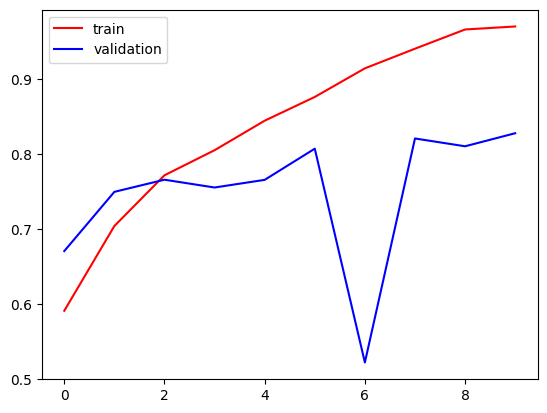

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()


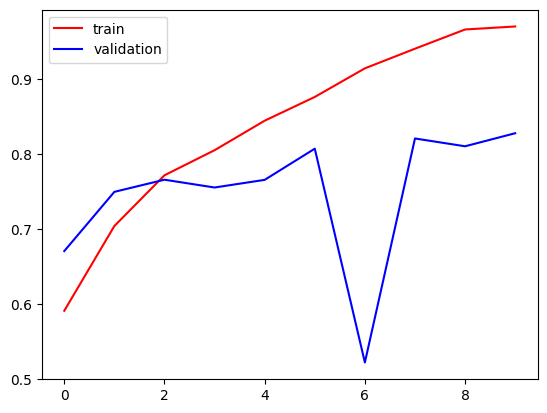

In [14]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()



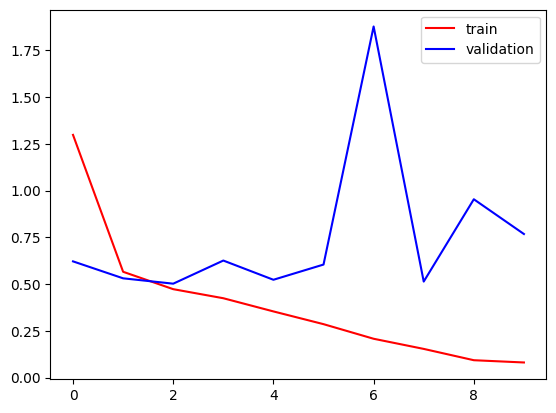

In [15]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

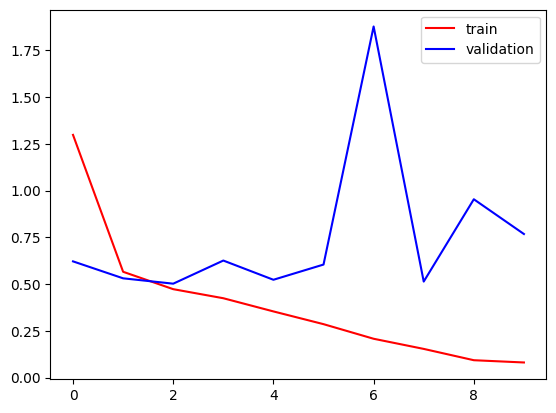

In [16]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()


In [17]:
import cv2

In [19]:
test_image = cv2.imread('/content/cat.webp')

In [20]:
#need to reduce complexity


In [21]:
#add more data
#reducing complexity


In [22]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


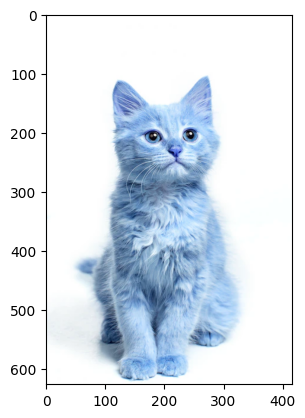

In [23]:
plt.imshow(test_image)


In [24]:
test_image.shape


(626, 417, 3)

In [25]:
test_image=cv2.resize(test_image,(256,256))

In [26]:
test_input = test_image.reshape(1,256,256,3)


In [27]:
model.predict(test_input)

1/1 [==============================] - 0s 387ms/step


array([[0.]], dtype=float32)